<a href="https://colab.research.google.com/github/Vishva-D/-Solve4aBillion-Challenge/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt


In [ ]:
covid = pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
covid.tail(10)
covid["State"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
       'Haryana', 'Jharkhand', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Maharashtra', 'Meghalaya', 'Manipur', 'Madhya Pradesh',
       'Mizoram', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
       'Telangana', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Sikkim',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland'],
      dtype=object)

In [ ]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (162301, 8)
Checking for null values Date             0
State            0
District         0
Confirmed        0
Recovered        0
Deceased         0
Other            0
Tested       50876
dtype: int64
Checking Data-type Date          object
State         object
District      object
Confirmed      int64
Recovered      int64
Deceased       int64
Other          int64
Tested       float64
dtype: object


In [ ]:
#Dropping the column
covid.drop(["Tested"],1,inplace=True)


In [ ]:
covid.isnull().sum()

Date         0
State        0
District     0
Confirmed    0
Recovered    0
Deceased     0
Other        0
dtype: int64

In [ ]:
covid["Date"] = pd.to_datetime(covid["Date"])

In [ ]:
#Grouping differnent types of cases as per the date
datewise = covid.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
datewise.tail()

,Confirmed,Recovered,Deceased
Date,,,
2021-01-02,10324613,9926473,149471
2021-01-03,10341291,9946131,149686
2021-01-04,10357569,9975340,149886
2021-01-05,10375478,9996501,150151
2021-01-06,10377329,9998398,150179


In [ ]:
print("Basic Information")
print("Total average of Confirmed cases around the india",datewise["Confirmed"].iloc[-1])
print("Total average of Recovered cases around the india",datewise["Recovered"].iloc[-1])
print("Total average of Death cases around the india",datewise["Deceased"].iloc[-1])
print("Total average of Active cases around the india",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deceased"].iloc[-1]))
print("Total average of Closed cases around the india",(datewise["Recovered"].iloc[-1]+datewise["Deceased"].iloc[-1]))


Basic Information
Total average of Confirmed cases around the india 10377329
Total average of Recovered cases around the india 9998398
Total average of Death cases around the india 150179
Total average of Active cases around the india 228752
Total average of Closed cases around the india 10148577


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

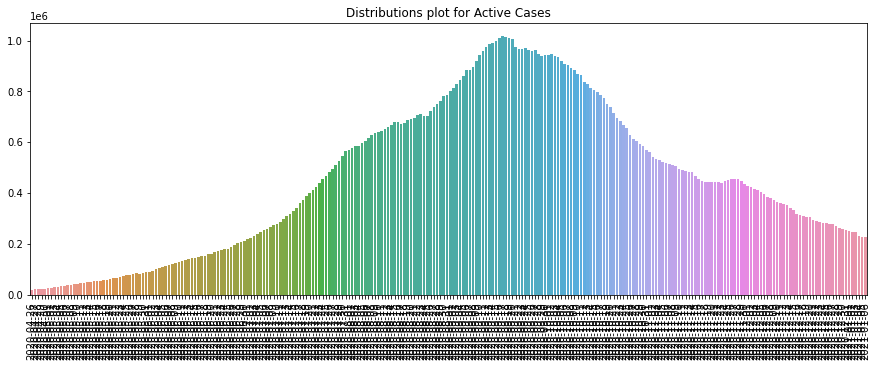

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deceased"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

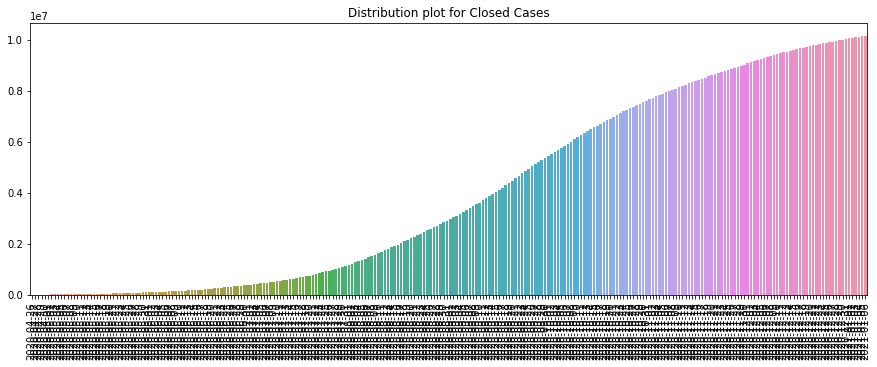

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deceased"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

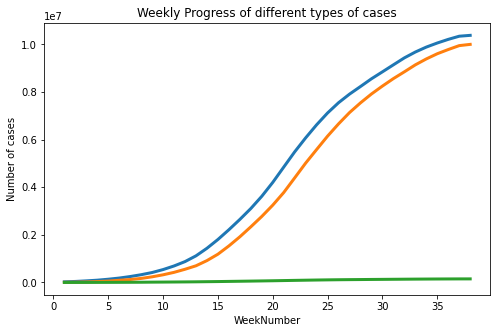

In [ ]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deceased"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth =3)
plt.plot(week_num,weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

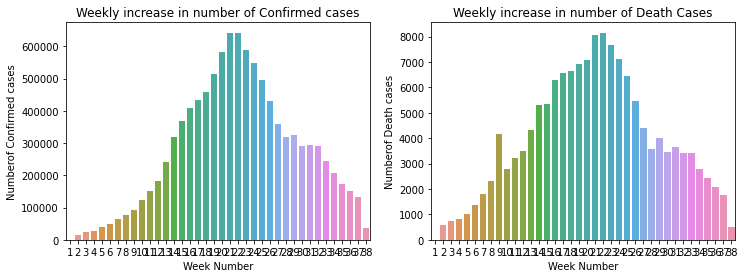

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Confirmed cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Confirmed cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Confirmed cases everyday: 40427.0
Average increase in number of Recovered cases everyday: 39031.0
Average increase in number of Death cases everyday: 583.0


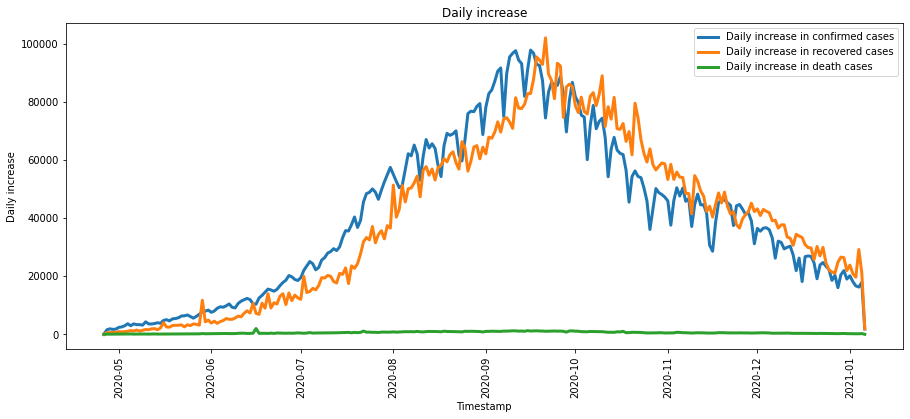

In [ ]:
print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deceased"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deceased"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Country wise analysis
#Calculating Country wise Mortality rate
districtwise = covid[covid["Date"]==covid["Date"].max()].groupby(["District"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"}).sort_values(["Confirmed"],ascending=False)
districtwise["Mortality"]=(districtwise["Deceased"]/districtwise["Recovered"])*100
districtwise["Recovered"]=(districtwise["Recovered"]/districtwise["Confirmed"])*100
#covid["District"].drop(["Unknown"],inplace=True)
districtwise=districtwise.drop(labels="Unknown", axis=0)


Text(0.5, 1.0, 'Top 15 Mortality Rates in Covid 19')

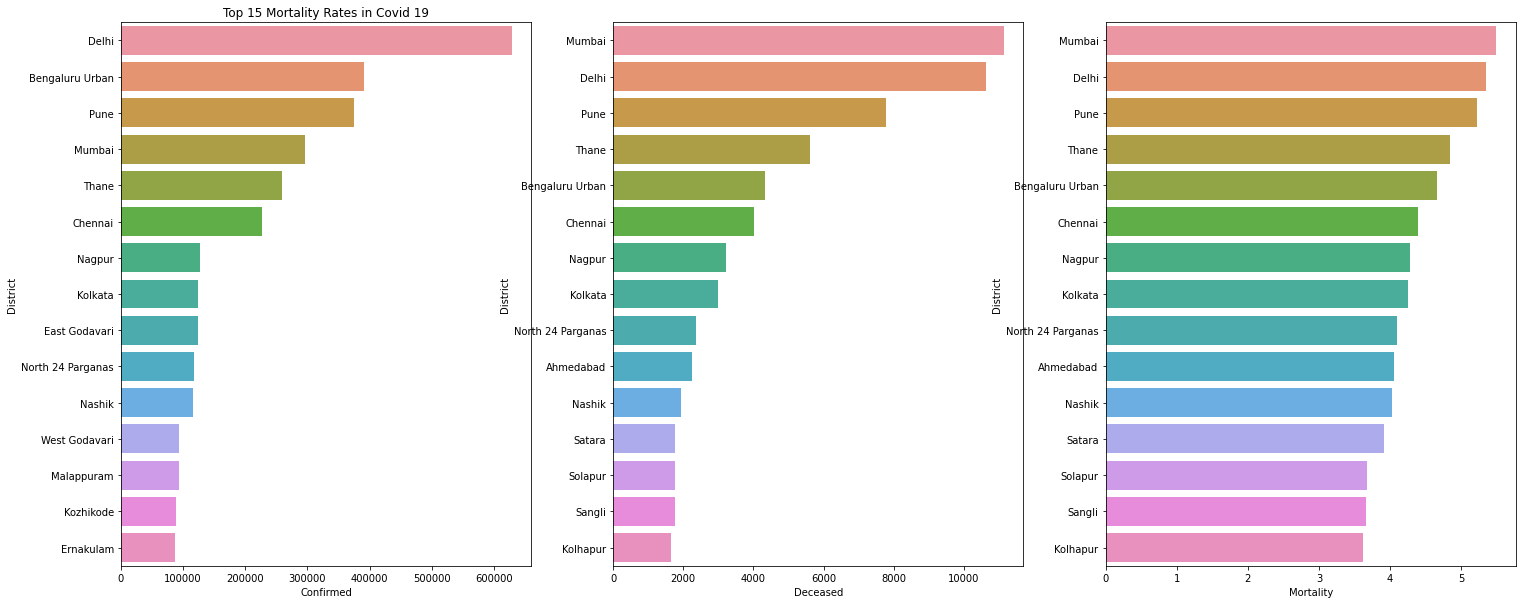

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(25,10))
top_15confirmed = districtwise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = districtwise.sort_values(["Deceased"],ascending=False).head(15)
top15_Mortality=districtwise.sort_values(['Mortality'],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 districts as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deceased"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 Districts as per number of death cases")
sns.barplot(x=top15_Mortality["Mortality"],y=top_15deaths.index,ax=ax3)
ax1.set_title("Top 15 Mortality Rates in Covid 19")

In [ ]:
#Data Anlaysis for kerala
kerala_data = covid[covid["State"]=="Kerala"]
datewise_india = kerala_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deceased"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deceased"].iloc[-1])

Confirmed    784489
Recovered    717311
Deceased       3185
Name: 2021-01-06 00:00:00, dtype: int64
Total Active Cases 63993
Total Closed Cases 720496


In [ ]:
#Data Anlaysis for bengal
bengal_data = covid[covid["State"]=="West Bengal"]
datewise_bengal = bengal_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
print(datewise_bengal.iloc[-1])
print("Total Active Cases",datewise_bengal["Confirmed"].iloc[-1]-datewise_bengal["Recovered"].iloc[-1]-datewise_bengal["Deceased"].iloc[-1])
print("Total Closed Cases",datewise_bengal["Recovered"].iloc[-1]+datewise_bengal["Deceased"].iloc[-1])

Confirmed    556384
Recovered    537250
Deceased       9841
Name: 2021-01-06 00:00:00, dtype: int64
Total Active Cases 9293
Total Closed Cases 547091


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

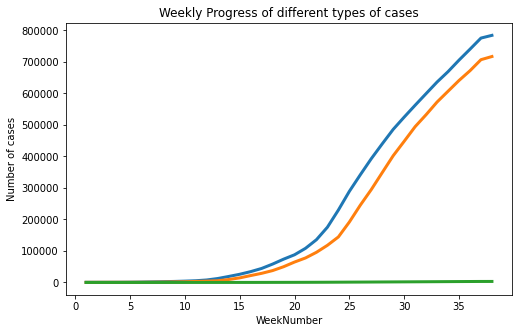

In [ ]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deceased"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [ ]:
print(covid["State"].unique())


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Himachal Pradesh' 'Haryana' 'Jharkhand' 'Jammu and Kashmir' 'Karnataka'
 'Kerala' 'Ladakh' 'Maharashtra' 'Meghalaya' 'Manipur' 'Madhya Pradesh'
 'Mizoram' 'Odisha' 'Punjab' 'Puducherry' 'Rajasthan' 'Telangana'
 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal'
 'Sikkim' 'Dadra and Nagar Haveli and Daman and Diu' 'Nagaland']


In [ ]:
max_ind = datewise_india["Confirmed"].max()
Maharashtra_data = covid[covid["State"]=="Maharashtra"]
Punjab_data = covid[covid["State"]=="Punjab"]
AndhraPradesh = covid[covid["State"]=="Andhra Pradesh"]
Gujarat_data = covid[covid["State"]=="Gujarat"]
datewise_andh=AndhraPradesh.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
datewise_maha = Maharashtra_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
datewise_punj = Punjab_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
datewise_guj = Gujarat_data.groupby(["Date"]).agg({"Confirmed":"sum","Recovered":"sum","Deceased":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_andh[(datewise_andh["Confirmed"]>0)&(datewise_andh["Confirmed"]<=max_ind)].shape[0],"days in Andhra to reach number of Confirmed Cases")
print("It took",datewise_maha[(datewise_maha["Confirmed"]>0)&(datewise_maha["Confirmed"]<=max_ind)].shape[0],"days in maharasthra to reach number of Confirmed Cases")
print("It took",datewise_punj[(datewise_punj["Confirmed"]>0)&(datewise_punj["Confirmed"]<=max_ind)].shape[0],"days in punjab to reach number of Confirmed Cases")
print("It took",datewise_guj[(datewise_guj["Confirmed"]>0)&(datewise_guj["Confirmed"]<=max_ind)].shape[0],"days in Gujarat to reach number of Confirmed Cases")

It took 256 days in India to reach 784489 Confirmed Cases
It took 176 days in Andhra to reach number of Confirmed Cases
It took 127 days in maharasthra to reach number of Confirmed Cases
It took 256 days in punjab to reach number of Confirmed Cases
It took 256 days in Gujarat to reach number of Confirmed Cases


In [ ]:
datewise_andh

,Confirmed,Recovered,Deceased
Date,,,
2020-04-26,1097,231,31
2020-04-27,1177,235,31
2020-04-28,1259,258,31
2020-04-29,1332,287,31
2020-04-30,1403,321,31
...,...,...,...
2021-01-02,882850,872545,7111
2021-01-03,883082,872897,7115
2021-01-04,883210,873149,7118


In [ ]:
datewise_andh["Date"]=datewise_andh.index-datewise_andh.index[0]
datewise_andh["Date"] = datewise_andh["Date"].dt.days
train_ml = datewise_andh.iloc[:int(datewise_andh.shape[0]*0.95)]
valid_ml = datewise_andh.iloc[:int(datewise_andh.shape[0]*0.95):]
model_scores=[]
train_ml

,Confirmed,Recovered,Deceased,Date
Date,,,,
2020-04-26,1097,231,31,0
2020-04-27,1177,235,31,1
2020-04-28,1259,258,31,2
2020-04-29,1332,287,31,3
2020-04-30,1403,321,31,4
...,...,...,...,...
2020-12-20,878723,867445,7076,238
2020-12-21,878937,867867,7078,239
2020-12-22,879339,868279,7082,240


In [ ]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Date"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Date"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Date"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Date"]).reshape(-1,1))

In [ ]:
prediction_valid_lin_reg.max()

1005899.2044457938

In [ ]:
prediction_valid_svm.max()

1306560.9279639153

In [ ]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise_andh.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise_andh["Date"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise_andh["Date"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2021-01-07,1075227,1681020
1,2021-01-08,1080179,1711091
2,2021-01-09,1085131,1741634
3,2021-01-10,1090083,1772653
4,2021-01-11,1095035,1804156


In [ ]:
model_train=datewise_andh.iloc[:int(datewise_andh.shape[0]*0.85)]
valid=datewise_andh.iloc[int(datewise_andh.shape[0]*0.85):]

In [ ]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [ ]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise_andh.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2021-01-07,1075227,1681020,904042
1,2021-01-08,1080179,1711091,904968
2,2021-01-09,1085131,1741634,905895
3,2021-01-10,1090083,1772653,906821
4,2021-01-11,1095035,1804156,907747
